In [4]:
import os
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.patches as patches

In [5]:
# Загружаем фото

In [6]:
folder_path_LEARN = f'face_jpg/normalize_faces/'
file_list_LEARN = [folder_path_LEARN + f for f in os.listdir(folder_path_LEARN) if os.path.isfile(os.path.join(folder_path_LEARN, f))]

In [7]:
result = DeepFace.verify(img1_path='face_jpg/normalize_faces/faces_1.jpg',
                         img2_path='face_jpg/normalize_faces/faces_2.jpg', 
                         model_name='ArcFace', enforce_detection=False)

In [8]:
result

{'verified': False,
 'distance': 0.7446295596610071,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 38, 'y': 5, 'w': 171, 'h': 171},
  'img2': {'x': 0, 'y': 0, 'w': 224, 'h': 224}},
 'time': 5.15}

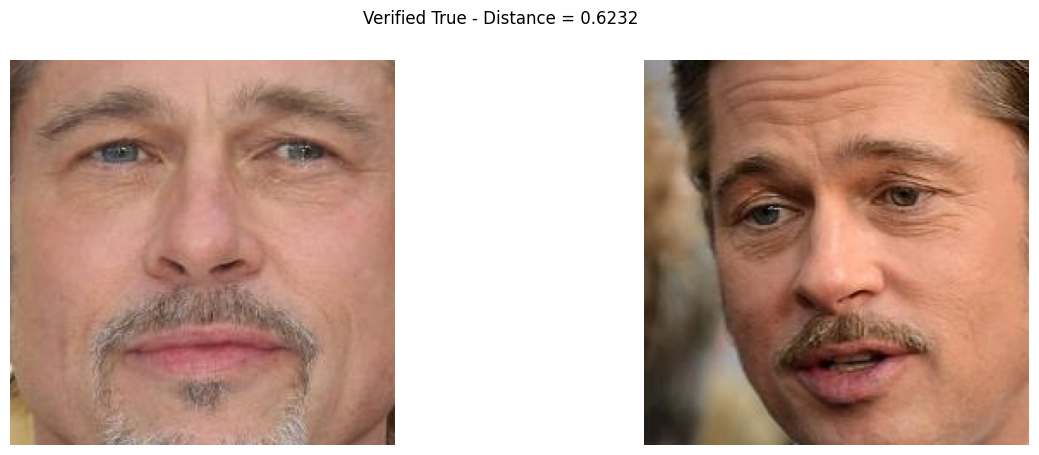

In [9]:
result = DeepFace.verify(
    img1_path='face_jpg/normalize_faces/faces_2.jpg',
    img2_path='face_jpg/normalize_faces/faces_3.jpg', 
    model_name='ArcFace', enforce_detection=False)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(plt.imread('face_jpg/normalize_faces/faces_2.jpg'))
axs[1].imshow(plt.imread('face_jpg/normalize_faces/faces_3.jpg'))
fig.suptitle(f'Verified {result["verified"]} - Distance = {result["distance"]:0.4}')
axs[0].axis('off')
axs[1].axis('off')
plt.show()

# FaceRecognition

# START

In [10]:
test_group_img_path = 'face_jpg/group/12345.jpg'

In [11]:
image = face_recognition.load_image_file(test_group_img_path)

# Поиск лиц на изображении
face_locations = face_recognition.face_locations(image)

# Извлечение и сохранение каждого лица
faces_loc = {}
for i, face_location in enumerate(face_locations):
    top, right, bottom, left = face_location

    # Извлечение области лица из изображения
    face_image = image[top:bottom, left:right]
    faces_loc[f'face_jpg/gp_faces/face_{i + 1}.jpg'] = face_location
    face_image_path = os.path.join('face_jpg/gp_faces', f"face_{i + 1}.jpg")
    Image.fromarray(face_image).save(face_image_path)

In [12]:
folder_path_TEST = f'face_jpg/gp_faces/'
file_list_TEST = [folder_path_TEST + f for f in os.listdir(folder_path_TEST) if os.path.isfile(os.path.join(folder_path_TEST, f))]
file_list_TEST

['face_jpg/gp_faces/face_1.jpg',
 'face_jpg/gp_faces/face_10.jpg',
 'face_jpg/gp_faces/face_11.jpg',
 'face_jpg/gp_faces/face_12.jpg',
 'face_jpg/gp_faces/face_13.jpg',
 'face_jpg/gp_faces/face_2.jpg',
 'face_jpg/gp_faces/face_3.jpg',
 'face_jpg/gp_faces/face_4.jpg',
 'face_jpg/gp_faces/face_5.jpg',
 'face_jpg/gp_faces/face_6.jpg',
 'face_jpg/gp_faces/face_7.jpg',
 'face_jpg/gp_faces/face_8.jpg',
 'face_jpg/gp_faces/face_9.jpg']

In [13]:
result = {}
for i, man in enumerate(file_list_TEST):
    print(i)
    r = DeepFace.find(img_path=man, db_path="face_jpg/normalize_faces", model_name='ArcFace', enforce_detection=False)
    result[man] = r[0]['distance'].mean()

0
24-02-23 10:33:32 - There are 10 representations found in representations_arcface.pkl
24-02-23 10:33:32 - find function lasts 0.3349645137786865 seconds
1
24-02-23 10:33:32 - There are 10 representations found in representations_arcface.pkl
24-02-23 10:33:32 - find function lasts 0.3160066604614258 seconds
2
24-02-23 10:33:32 - There are 10 representations found in representations_arcface.pkl
24-02-23 10:33:33 - find function lasts 0.3024892807006836 seconds
3
24-02-23 10:33:33 - There are 10 representations found in representations_arcface.pkl
24-02-23 10:33:33 - find function lasts 0.3085200786590576 seconds
4
24-02-23 10:33:33 - There are 10 representations found in representations_arcface.pkl
24-02-23 10:33:33 - find function lasts 0.30355000495910645 seconds
5
24-02-23 10:33:33 - There are 10 representations found in representations_arcface.pkl
24-02-23 10:33:34 - find function lasts 0.2863199710845947 seconds
6
24-02-23 10:33:34 - There are 10 representations found in represent

In [14]:
result

{'face_jpg/gp_faces/face_1.jpg': 0.5302063549562794,
 'face_jpg/gp_faces/face_10.jpg': nan,
 'face_jpg/gp_faces/face_11.jpg': nan,
 'face_jpg/gp_faces/face_12.jpg': nan,
 'face_jpg/gp_faces/face_13.jpg': nan,
 'face_jpg/gp_faces/face_2.jpg': nan,
 'face_jpg/gp_faces/face_3.jpg': nan,
 'face_jpg/gp_faces/face_4.jpg': nan,
 'face_jpg/gp_faces/face_5.jpg': nan,
 'face_jpg/gp_faces/face_6.jpg': nan,
 'face_jpg/gp_faces/face_7.jpg': nan,
 'face_jpg/gp_faces/face_8.jpg': nan,
 'face_jpg/gp_faces/face_9.jpg': nan}

In [15]:
coord_man = None
for i in result:
    if result[i] < 6:
        coord_man = faces_loc[i]
        

In [16]:

image = Image.open(test_group_img_path)
draw = ImageDraw.Draw(image)

# Рисование прямоугольника вокруг лица
top, right, bottom, left = coord_man
draw.rectangle([left, top, right, bottom], outline="red", width=9)

# Сохранение изображения с выделенным лицом
image.save("huy.jpg")

# Отображение изображения с выделенным лицом
image.show()


# image = cv2.imread(test_group_img_path)
# # Заданные координаты лица (x, y, ширина, высота)
# top, right, bottom, left = coord_man
# 
# 
# fig, ax = plt.subplots(1)
# ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# 
# 
# # Добавление прямоугольника для выделения лица
# rect = patches.Rectangle((left, top), right - left, bottom - top, linewidth=2, edgecolor='g', facecolor='none')
# ax.add_patch(rect)
# # Отображение изображения с выделенным лицом
# plt.show()


In [17]:
# folder_path = "face_jpg/gp_faces/"
# exit()
# # Получить список файлов в папке
# files = os.listdir(folder_path)
# 
# # Пройти по списку файлов и удалить каждый
# for file in files:
#     file_path = os.path.join(folder_path, file)
#     try:
#         if os.path.isfile(file_path):
#             os.remove(file_path)
#             print(f"Файл {file} удален успешно")
#         else:
#             print(f"{file} не является файлом")
#     except Exception as e:
#         print(f"Ошибка при удалении {file}: {e}")